## If you find this kernel helpful, Please UPVOTES.

## Problem Definition
* Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Data contains;

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [247]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor


# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Disabling warnings
import warnings
warnings.simplefilter("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-disease-uci/heart.csv


## READ DATA AND EXPLORING DATA

In [248]:
data=pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
df=data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [249]:
data.sample(5)  #chose randon sample from row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [251]:
df.target.unique()

array([1, 0])

In [252]:
df.isnull().sum()  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [253]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [254]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [255]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## SOME VISUALIZATION

### Count of disease and not desease

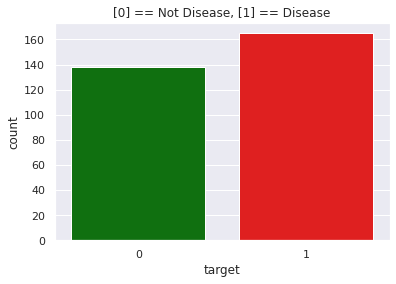

In [256]:
sns.countplot(df.target, palette=['green', 'red'])
plt.title("[0] == Not Disease, [1] == Disease");

### Distribution of disease and not disease with scatter

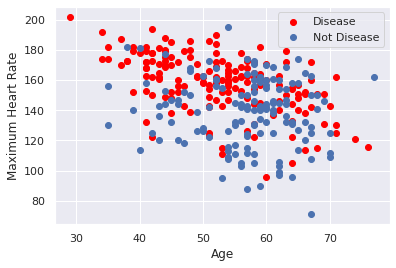

In [257]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### Distrbution of age with distplot*

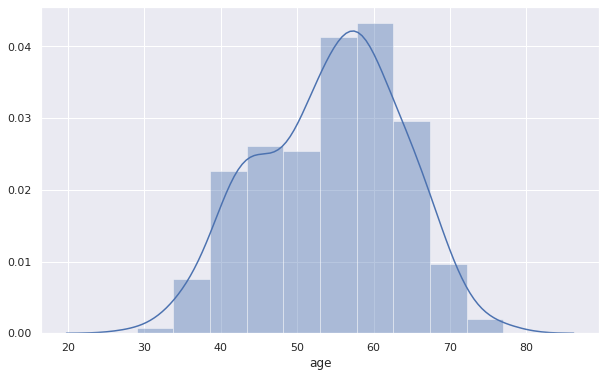

In [258]:
f, ax = plt.subplots(figsize=(10,6)) #DISTRUBUTION OF AGE WITH DISTPLOT
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

### Distribution of age with boxplot

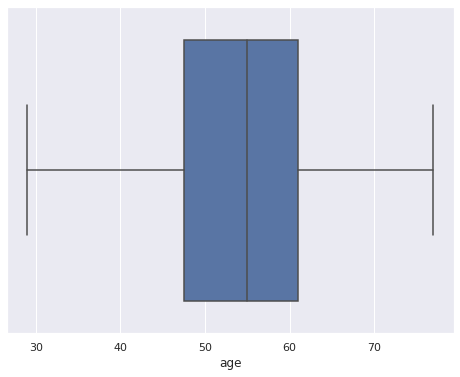

In [259]:
f, ax = plt.subplots(figsize=(8, 6))   #DISTRUBUTION OF AGE WITH BOXPLOT
sns.boxplot(x=df["age"])
plt.show()

### Dividing into age groups

In [260]:
young_ages=df[(df.age>=29)&(df.age<40)] 
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


### Dividing into age groups with barplot

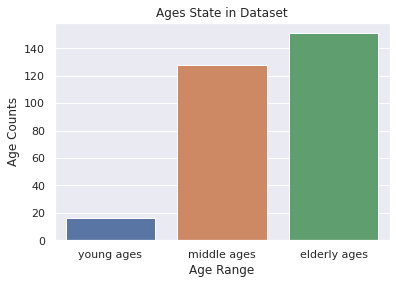

In [261]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

* There are a few young ages

### Dividing into age groups with pieplot

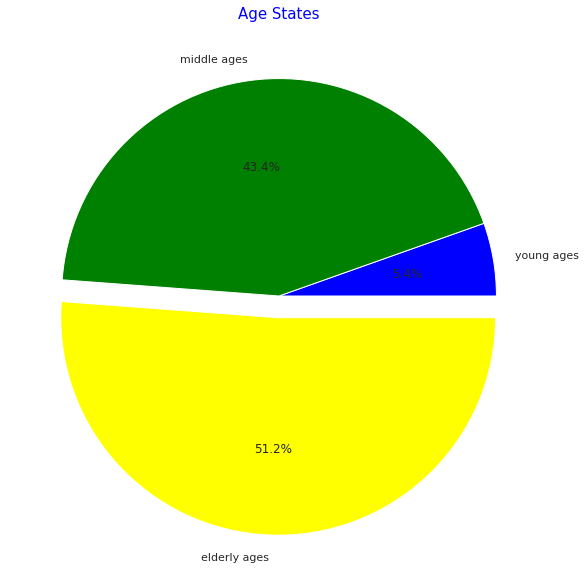

In [262]:
colors = ['blue','green','yellow']  #we can see in pie.
explode = [0,0,0.1]
plt.figure(figsize = (10,10))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

### Distrubution of Age and Target with violinplot

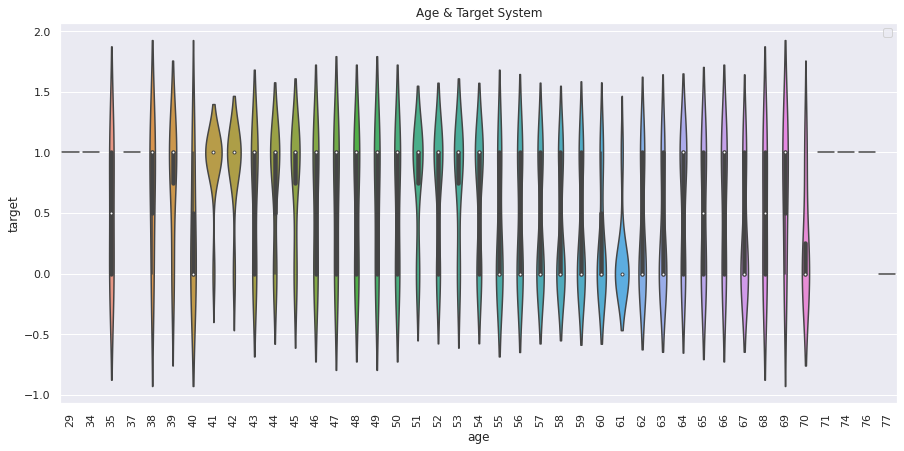

In [263]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df.age,y=df.target)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & Target System")
plt.show()

In [264]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### sex and ca (hue=target) with barplot

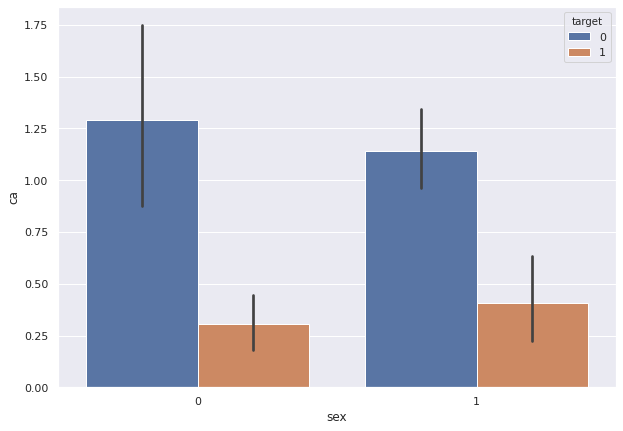

In [265]:
plt.figure(figsize=(10,7))
sns.barplot(x="sex",y = 'ca',hue = 'target',data=df);

### Sex and Oldpeak(hue=restecg)

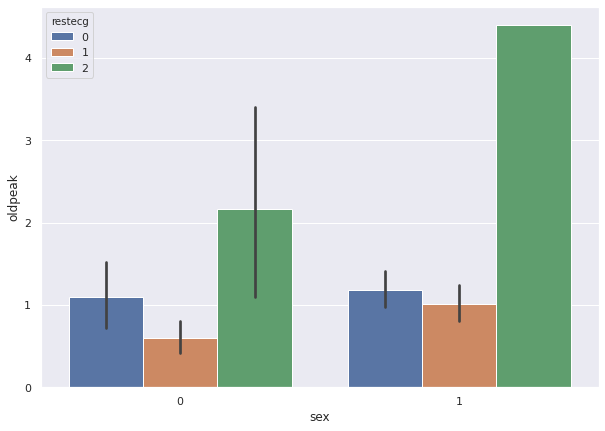

In [266]:
plt.figure(figsize=(10,7))
sns.barplot(x="sex",y = 'oldpeak',hue = 'restecg',data=df);

### Count of target with hue=sex

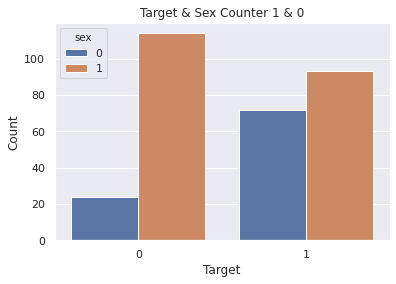

In [267]:
sns.countplot(df.target,hue=df.sex)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target & Sex Counter 1 & 0')
plt.show()

### Number of people who have heart disease according to age 

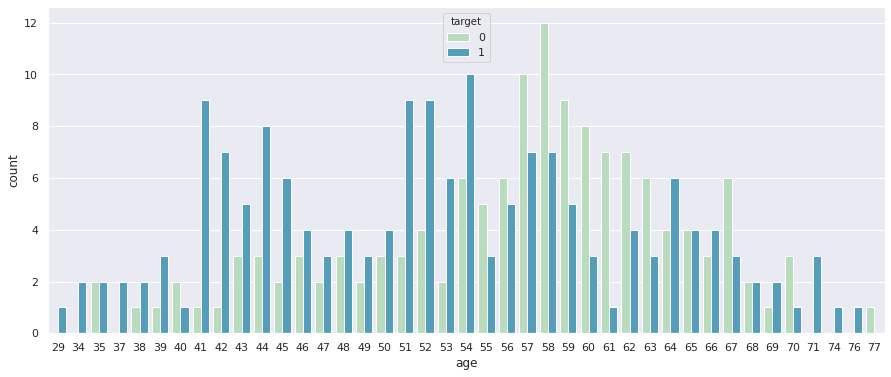

In [268]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()#Number of people who have heart disease according to age 

## Correlation matrix(heatmap)

(14.5, -0.5)

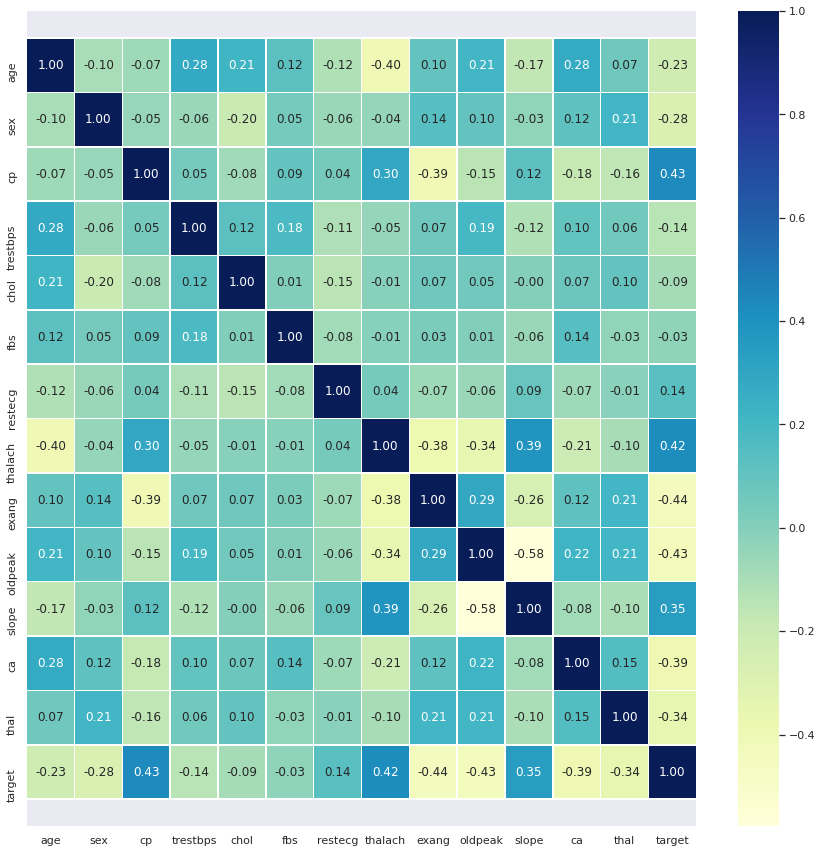

In [269]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Interpretation of heatmap
From the above correlation heat map, we can conclude that :-

* target and cp variable are mildly positively correlated (correlation coefficient = 0.43).

* target and thalach variable are also mildly positively correlated (correlation coefficient = 0.42).

* target and slope variable are weakly positively correlated (correlation coefficient = 0.35).

* target and exang variable are mildly negatively correlated (correlation coefficient = -0.44).

* target and oldpeak variable are also mildly negatively correlated (correlation coefficient = -0.43).

* target and ca variable are weakly negatively correlated (correlation coefficient = -0.39).

* target and thal variable are also waekly negatively correlated (correlation coefficient = -0.34).

In [270]:
df.groupby('cp',as_index=False)['target'].mean()

,cp,target
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [271]:
df.groupby('slope',as_index=False)['target'].mean()

,slope,target
0,0,0.428571
1,1,0.350000
2,2,0.753521


In [272]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


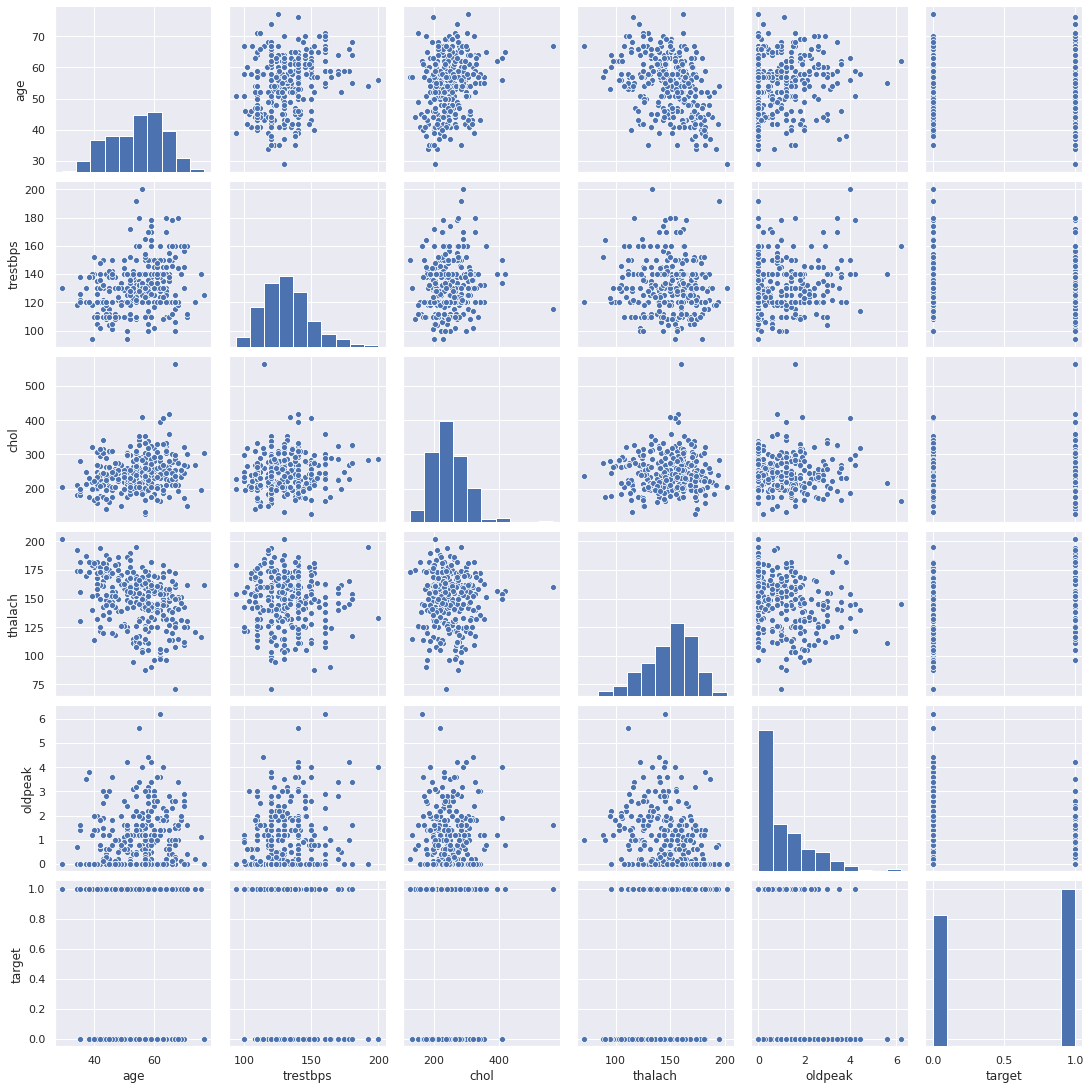

In [273]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

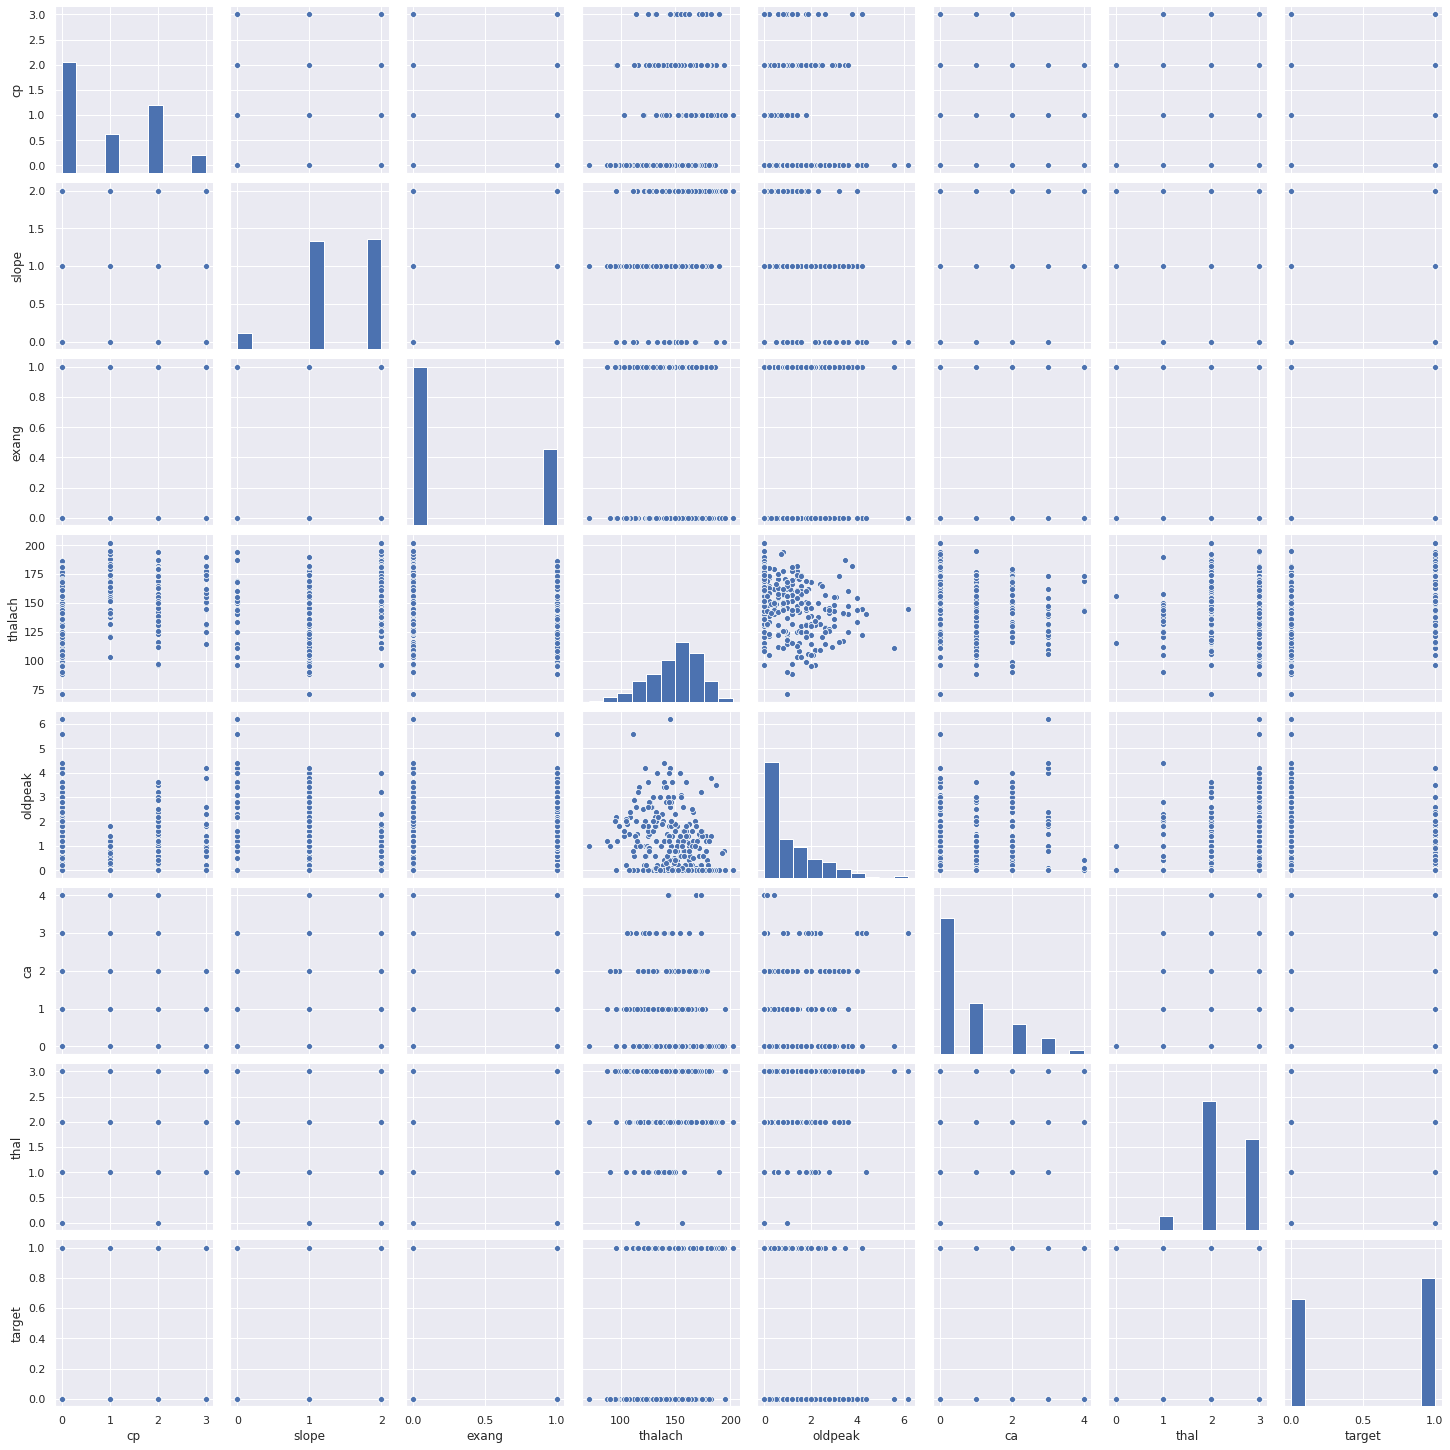

In [274]:
num_var = ['cp', 'slope', 'exang', 'thalach', 'oldpeak','ca','thal', 'target' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

### correlation only with target and other variables

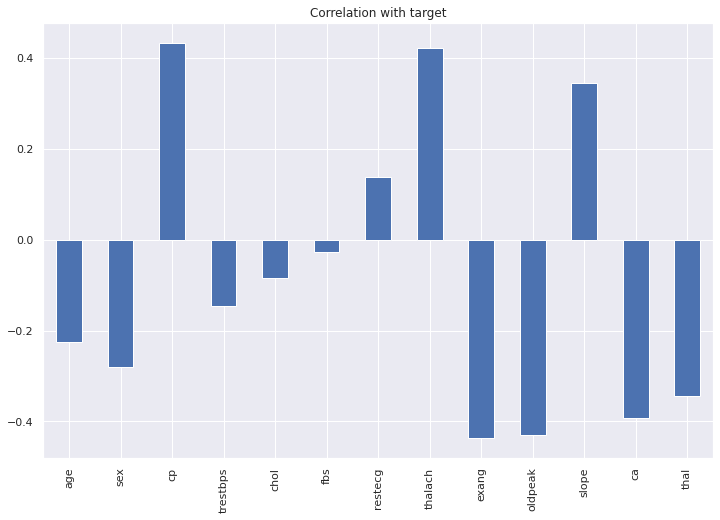

In [275]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

## Target and Thalech

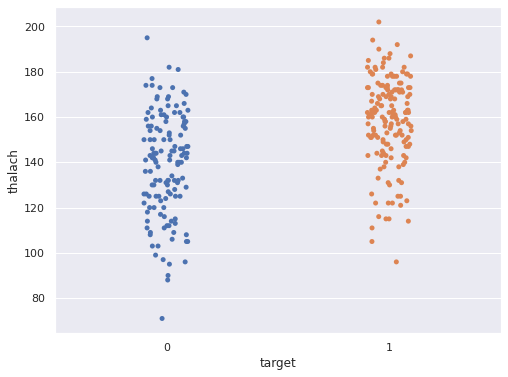

In [276]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df)
plt.show()

### Interpretation
* We can see that those people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).


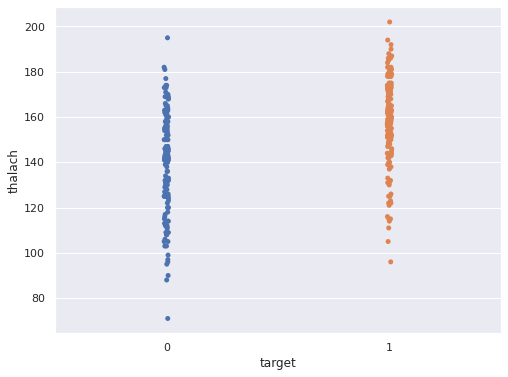

In [277]:
f, ax = plt.subplots(figsize=(8, 6))# with jitter
sns.stripplot(x="target", y="thalach", data=df, jitter = 0.01)
plt.show()

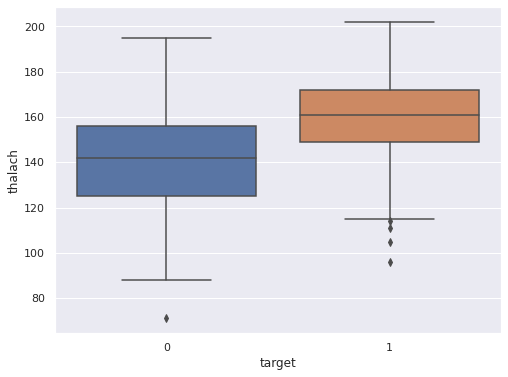

In [278]:
f, ax = plt.subplots(figsize=(8, 6))  #with boxplot
sns.boxplot(x="target", y="thalach", data=df)
plt.show()

#### CONCLUSION OF VISUALIZATION
Findings of Bivariate Analysis are as follows:

* There is no variable which has strong positive correlation with target variable.

* There is no variable which has strong negative correlation with target variable.

* There is no correlation between target and fbs.

* The cp and thalach variables are mildly positively correlated with target variable.

* We can see that the thalach variable is slightly negatively skewed.

* The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

## LETS NORMALIZE THE VARIABLES 

### Normalization

In [279]:
y = df.target.values
x_dat = df.drop(['target'], axis = 1)
x=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values

# LETS TRY CLASSIFICATIONS METHODS
* Now we've got our data split into training and test sets, it's time to build a machine learning model.

* We'll train it (find the patterns) on the training set.

* And we'll test it (use the patterns) on the test set.

* We're going to try  machine learning models:
   * 1)Logistic Regression
   * 2)K-Nearest Neighbours Classifier
   * 3)Support Vector machine
   * 4)Decision Tree Classifier
   * 5)Random Forest Classifier

## 1)LOGISTIC REGRESSION:
 * Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

### A ) Train-test splitting

In [280]:
y=df.target.values
x_dat=df.drop(["target"],axis=1)

In [281]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

### B ) Modeling of Logistic R. Method

In [282]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver = 'liblinear')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [283]:
lr #We can see what there is in lr(icinde hangi secenekler vargormek icin) 

#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   #intercept_scaling=1, l1_ratio=None, max_iter=100,
                  # multi_class='auto', n_jobs=None, penalty='l2',
                  # random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                  # warm_start=False)

LogisticRegression(solver='liblinear')

In [284]:
lr.intercept_  #sabit katsayi

array([0.70625262])

In [285]:
lr.coef_   #degisken katsayilari

array([[-0.27076552, -1.13308986,  1.85597462, -0.47045481, -0.22358863,
         0.08676798,  0.80663416,  1.25023871, -1.07453984, -1.48537845,
         1.38422615, -2.04271376, -1.35094158]])

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [286]:
l_score=accuracy_score(y_test,y_pred)
l_score
#The y predicted by the y in the test are compared(test deki y ile tahmin edilen yler karsilastiriliyor.Dogru tahmin etme yuzdesi bulunuyor)

0.8552631578947368

In [287]:
c_l=confusion_matrix(y_test,y_pred)# We found the numbers of guessing with confusion matrix, 31 for 1 correct guess, 0 for 35 correct guess
c_l                               #The top was imported.
#confusion matrixle tahmin etme sayilarini bulduk,1 icin 31 i dogru tahmin,0 icin 35 i dogru tahmin
#En ustte import edildi.

array([[30,  5],
       [ 6, 35]])

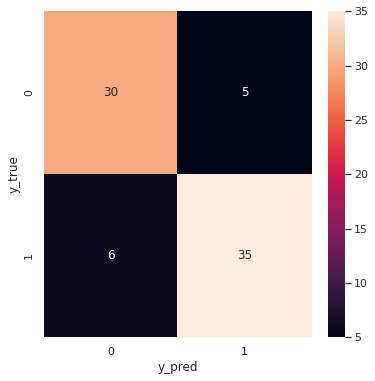

In [288]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=lr.predict(x_test)
cmlr=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [289]:
print(classification_report(y_test,y_pred)) #yukarda import edildi

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



#### LOOK AT ALL PREDICTION VALUE ON TEST DATA:

In [290]:
lr.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [291]:
lr.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

array([[0.88140122, 0.11859878],
       [0.27427984, 0.72572016],
       [0.20714283, 0.79285717],
       [0.9023849 , 0.0976151 ],
       [0.10088284, 0.89911716],
       [0.13363957, 0.86636043],
       [0.53858774, 0.46141226],
       [0.9764746 , 0.0235254 ],
       [0.96818223, 0.03181777],
       [0.57473994, 0.42526006]])

### E ) TUNING THE PREDICTION: WE can tune our prediction


In [292]:
y_probs = lr.predict_proba(x_test)[:,1]

In [293]:
y_pred = [1 if i>0.52 else 0 for i in y_probs]
y_pred[-10:]

[1, 1, 1, 1, 1, 1, 0, 1, 0, 1]

In [294]:
confusion_matrix(y_test,y_pred)

array([[30,  5],
       [ 6, 35]])

In [295]:
accuracy_score(y_test,y_pred)

0.8552631578947368

* We can see, If we change our condition for probobilty,our prediction and confusion matrix and accuracy_score change

## 2)NAIVE BAYES METHOD
* In machine learning, Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. 
* Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.


### A ) Train-test splitting

In [296]:
y = df.target
x = df.drop('target',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

### B ) Modeling of Naive B. Method

In [297]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)
y_pred[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [298]:
nb  #we can look at which option is there in GaussionNB

GaussianNB()

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [299]:
n_score=accuracy_score(y_test,y_pred)
n_score

0.881578947368421

In [300]:
c_nb=confusion_matrix(y_test,y_pred)
c_nb
#confusion matrixle tahmin etme sayilarini bulduk,1 icin 32 i dogru tahmin,0 icin 30 i dogru tahmin
#En ustte import edildi.

array([[31,  4],
       [ 5, 36]])

#### HEATMAP IN CONFUSION MATRIX: We can see the confusion matrix in Heatmap.

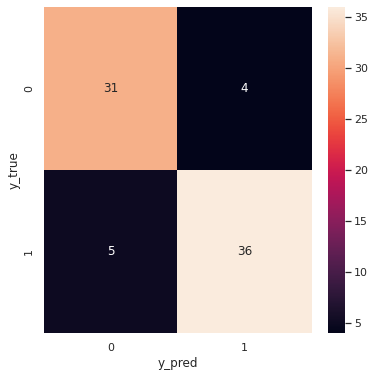

In [301]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=nb.predict(x_test)
cmnb=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmnb, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [302]:
print(classification_report(y_test,y_pred)) #yukarda import edildi

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



#### LOOK AT ALL PREDICTION VALUE ON TEST DATA.

In [303]:
nb.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [304]:
nb.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

array([[9.98004529e-01, 1.99547094e-03],
       [1.63463883e-01, 8.36536117e-01],
       [2.28223420e-02, 9.77177658e-01],
       [9.95469045e-01, 4.53095452e-03],
       [1.04259585e-02, 9.89574041e-01],
       [1.45258832e-02, 9.85474117e-01],
       [4.52644873e-01, 5.47355127e-01],
       [9.99999996e-01, 3.61261387e-09],
       [9.99996841e-01, 3.15883602e-06],
       [2.22262574e-01, 7.77737426e-01]])

### E ) TUNING THE PREDICTION: WE can tune our prediction

In [305]:
y_probs = nb.predict_proba(x_test)[:,1]
y_pred = [1 if i>0.45 else 0 for i in y_probs]
y_pred[0:10]

[0, 1, 1, 0, 1, 1, 1, 0, 0, 1]

In [306]:
nb_tuned_bestscore=accuracy_score(y_test,y_pred)
nb_tuned_bestscore

0.8947368421052632

In [307]:

cmnb_best=confusion_matrix(y_test,y_pred) 
cmnb_best

array([[31,  4],
       [ 4, 37]])

* If we tune our data for nb, it increase a little.
* nb_tuned_bestscore= % 89 and cmnb_best are our best best score and our best confusion matrix

## 3)KNN METHOD
* In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. 
* A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). 
* In this method we need to choose k value.It means that we chose k number of points of classes which are nearest to the out test point. We can call this small data set. We count the number of classes in the small dataset and determine the highest number of class. Finally we can say our test point belongs to the class.

* While choosing k number we have to be carefull because small k value causes overfitting while big k value causes underfitting.

* Coding is the same for all supervised classes and we jus need to change the last part of the code.

In [308]:
from sklearn.neighbors import KNeighborsClassifier
y=df.target
x=df.drop("target",axis=1)


### A ) Train-test splitting

In [309]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

### B ) Modeling of KNN Medhod

In [310]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [311]:
knn  ##we can look at which option is there in KNeighborsClassifier
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     #metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     #weights='uniform')

KNeighborsClassifier(n_neighbors=3)

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

#### Look at accuracy_score

In [312]:
knn_score=accuracy_score(y_test,y_pred)
knn_score

0.6710526315789473

In [313]:
c_knn=confusion_matrix(y_test,y_pred)
c_knn

array([[24, 11],
       [14, 27]])

#### HEATMAP IN CONFUSION MATRIX: We can see the confusion matrix in Heatmap.

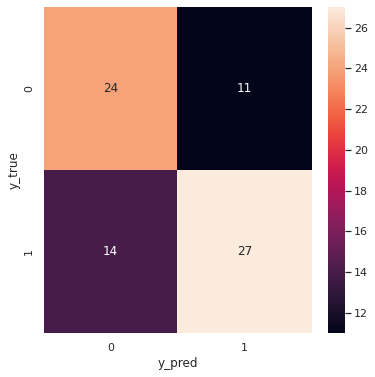

In [314]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=knn.predict(x_test)
cmknn=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmknn, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [315]:
print(classification_report(y_test,y_pred)) #yukarda import edildi

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        35
           1       0.71      0.66      0.68        41

    accuracy                           0.67        76
   macro avg       0.67      0.67      0.67        76
weighted avg       0.67      0.67      0.67        76



#### LOOK AT ALL PREDICTION VALUE ON TEST DATA.

In [316]:
knn.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [317]:
knn.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ]])

### E ) TUNING THE PREDICTION: WE can tune our prediction
* we can tune (n_neigbors,metric,..)

In [318]:
RMSE = []   # ERROR ON TRAIN DATA

for k in range(30):
    k = k+1
    knn = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  0.3268458257842665
k = 3 için RMSE değeri:  0.38890636979101223
k = 4 için RMSE değeri:  0.3958067654736509
k = 5 için RMSE değeri:  0.41555652403686744
k = 6 için RMSE değeri:  0.42441402407048756
k = 7 için RMSE değeri:  0.4277315033573143
k = 8 için RMSE değeri:  0.43507430121427826
k = 9 için RMSE değeri:  0.440078902431684
k = 10 için RMSE değeri:  0.4431564793594221
k = 11 için RMSE değeri:  0.4459744581423064
k = 12 için RMSE değeri:  0.4530043290888892
k = 13 için RMSE değeri:  0.4520082365670547
k = 14 için RMSE değeri:  0.45505047423391665
k = 15 için RMSE değeri:  0.45564926271403683
k = 16 için RMSE değeri:  0.45290301983366077
k = 17 için RMSE değeri:  0.45520998825655523
k = 18 için RMSE değeri:  0.45550362035775893
k = 19 için RMSE değeri:  0.4546770061361863
k = 20 için RMSE değeri:  0.4514294477052938
k = 21 için RMSE değeri:  0.45285821599783027
k = 22 için RMSE değeri:  0.4528904592562519
k = 23 için RMSE değeri: 

In [319]:
from sklearn.model_selection import GridSearchCV  
#We use Grid for tuning

In [320]:
knn_params = {'n_neighbors': np.arange(1,30,1)} #we obta
knn = KNeighborsRegressor()

In [321]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10) #cross validation yontemi kullaniliyor.nesnesi tanimlandi
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [322]:
print("Best Score:"+str(knn_cv_model.best_score_))
print("Best Parameters:"+str(knn_cv_model.best_params_))

Best Score:0.04983262994767592
Best Parameters:{'n_neighbors': 21}


* If we use n_neighbors=21, we can obtain best score...

In [323]:
knn_tuned =KNeighborsClassifier(n_neighbors = 21)
knn_tuned = knn_tuned.fit(x_train,y_train)
y_pred = knn_tuned.predict(x_test)
knn_tuned_score=accuracy_score(y_test,y_pred)
knn_tuned_score

0.7368421052631579

In [324]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(x_test)))

0.512989176042577

* we tune the knn ,than our score increase.

In [325]:
knn_tune2 =KNeighborsClassifier(n_neighbors = 21,metric='hamming')
knn_tune2.fit(x_train,y_train)
y_pred = knn_tune2.predict(x_test)
knn_tuned_bestscore=accuracy_score(y_test,y_pred)
knn_tuned_bestscore

0.8552631578947368

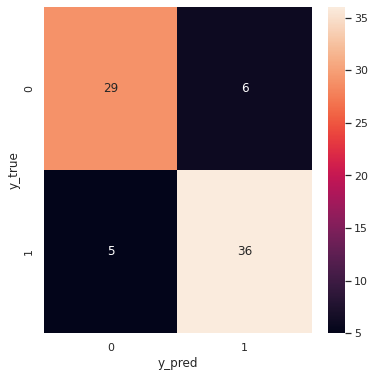

In [326]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=knn_tune2.predict(x_test)
cmknn_best=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmknn_best, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

* If we change metric and use tuned n-neigbors,acurracy_score is best..There are many kinds of metric in KNN. minkowski,hamming,.... 

### Conclusion KNN:
* knn_tuned_bestscore= % 85  and cmknn_best are our best best score and our best confusion matrix

## 4)SVM(SUPPORT VECTOR MACHINES)
* Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.
* SVM is used fo both regression and classification problems, but generally for classification. There is a C parameter inside the SVM algoritma and the default value of C parameter is 1. If C is small, it causes the misclassification. If C is big, it causes ovetfitting. So we need to try C parameter to find best value.

In [327]:
from sklearn.svm import SVC
y=df.target
x=df.drop("target",axis=1)

### A ) Train-test splitting

In [328]:
y = df.target
x = df.drop('target',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

### B ) Modeling of SVM Medhod

In [329]:
svm = SVC(C=5,degree=9,kernel = 'poly')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [330]:
svm
#SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    #decision_function_shape='ovr', degree=9, gamma='scale', kernel='poly',
    #max_iter=-1, probability=False, random_state=None, shrinking=True,
    #tol=0.001, verbose=False)

SVC(C=5, degree=9, kernel='poly')

In [331]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [332]:
svm_score1 = accuracy_score(y_test,y_pred)
svm_score1

0.8421052631578947

In [333]:
c_svm=confusion_matrix(y_test,y_pred)
c_svm

array([[27,  8],
       [ 4, 37]])

#### HEATMAP IN CONFUSION MATRIX: We can see the confusion matrix in Heatmap.

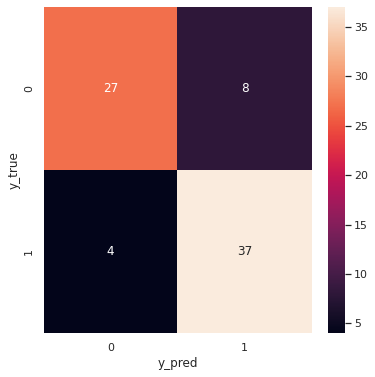

In [334]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=svm.predict(x_test)
cmsvm=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmsvm, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [335]:
print(classification_report(y_test,y_pred)) #yukarda import edildi

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



### E ) TUNING THE PREDICTION: WE can tune our prediction
* Look at c,kernel,gamma

#### Tuning1-change C and gamma

In [336]:
#EN UYGUN C VE GAMMA DEGERI BULMA
svc_params ={"C":[0.00001,0.001,0.01,5,10,50,100],
            "gamma":[0.0001,0.001,0.01,1,5,10,50,100]}
svc =SVC()
svc_cv_model = GridSearchCV(svc,svc_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
svc_cv_model.fit(x_train,y_train)
print("Best Parameters:"+str(svc_cv_model.best_params_))

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s


Best Parameters:{'C': 100, 'gamma': 0.0001}


[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    2.5s finished


In [337]:
# svm_tune1= SVC(C=100,gamma= 0.0001,degree=9,kernel = 'poly')
# svm_tune1.fit(x_train,y_train)
# y_pred = svm.predict(x_test)  # cok uzun suruyor

In [338]:
svm_score2 = accuracy_score(y_test,y_pred)
svm_score2

0.8421052631578947

#### Tuning2-changing kernel=linear,c=100

In [339]:
#we changed the kernel,We can use linear,poly,rbf...
svm_tune2 = SVC(C=100,degree=9,kernel = 'linear')
svm_tune2.fit(x_train,y_train)
y_pred = svm_tune2.predict(x_test)
accuracy_score(y_test,y_pred)

0.8421052631578947

Tuning3-changing kernel=rbf,c=100

In [340]:
#we changed the kernel,We can use linear,poly,rbf...
svm_tune3 = SVC(C=100,degree=9,kernel = 'rbf')
svm_tune3.fit(x_train,y_train)
y_pred = svm_tune3.predict(x_test)
accuracy_score(y_test,y_pred)

0.8157894736842105

In [341]:
# svc_tuned=SVC(C=100,gamma=0.0001,kernel = 'linear')
# svc_tuned.fit(x_train,y_train)
# y_pred = svc_tuned.predict(x_test)
# accuracy_score(y_test,y_pred)    #uzun suruyor

### Conclusion:

* svm_score1=84 is the best score and c_svm is the best confusion matrix

## 5)RANDOM FOREST METHOD
Random Forests is one of the most popular model. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators= [100, 300]) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees
* This methods basically use multiple number of decision trees and take the avarage of the results of these decision trees. And we use this avarage to determine the class of the test point.

* This is one of ensamble method which uses multiple classes to predict the target, and very powerfull technique.

In [342]:
from sklearn.ensemble import RandomForestClassifier
y=df.target
x=df.drop("target",axis=1)

### A ) Train-test splitting

In [343]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

### B ) Modeling of SVM Medhod

In [344]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [345]:
rf
#RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       #criterion='gini', max_depth=None, max_features='auto',
                       #max_leaf_nodes=None, max_samples=None,
                      # min_impurity_decrease=0.0, min_impurity_split=None,
                      # min_samples_leaf=1, min_samples_split=2,
                      # min_weight_fraction_leaf=0.0, n_estimators=100,
                      # n_jobs=None, oob_score=False, random_state=None,
                      # verbose=0, warm_start=False)

RandomForestClassifier()

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [346]:
rf_score=accuracy_score(y_test,y_pred)
rf_score

0.8421052631578947

In [347]:
c_rf=confusion_matrix(y_test,y_pred)
c_rf

array([[27,  8],
       [ 4, 37]])

#### HEATMAP IN CONFUSION MATRIX: We can see the confusion matrix in Heatmap.

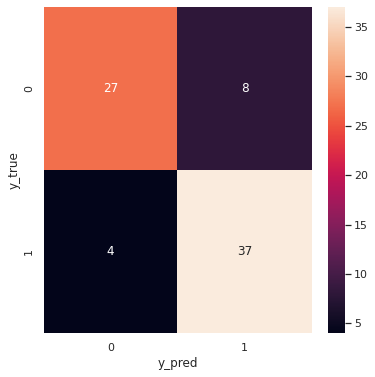

In [348]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=rf.predict(x_test)
cmlr=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [349]:
print(classification_report(y_test,y_pred)) #yukarda import edildi

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



#### LOOK AT ALL PREDICTION VALUE ON TEST DATA.

In [350]:
rf.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [351]:
rf.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

array([[0.95, 0.05],
       [0.26, 0.74],
       [0.47, 0.53],
       [0.92, 0.08],
       [0.22, 0.78],
       [0.08, 0.92],
       [0.29, 0.71],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.44, 0.56]])

### E ) TUNING THE PREDICTION: WE can tune our prediction
* n_estimators,importance variables,

n_estimators= 1 --> Accuracy: 73.68421052631578 %
n_estimators= 2 --> Accuracy: 71.05263157894737 %
n_estimators= 3 --> Accuracy: 77.63157894736842 %
n_estimators= 4 --> Accuracy: 75.0 %
n_estimators= 5 --> Accuracy: 85.52631578947368 %
n_estimators= 6 --> Accuracy: 82.89473684210526 %
n_estimators= 7 --> Accuracy: 85.52631578947368 %
n_estimators= 8 --> Accuracy: 84.21052631578947 %
n_estimators= 9 --> Accuracy: 84.21052631578947 %
n_estimators= 10 --> Accuracy: 81.57894736842105 %
n_estimators= 11 --> Accuracy: 86.8421052631579 %
n_estimators= 12 --> Accuracy: 84.21052631578947 %
n_estimators= 13 --> Accuracy: 85.52631578947368 %
n_estimators= 14 --> Accuracy: 84.21052631578947 %
n_estimators= 15 --> Accuracy: 85.52631578947368 %
n_estimators= 16 --> Accuracy: 85.52631578947368 %
n_estimators= 17 --> Accuracy: 86.8421052631579 %
n_estimators= 18 --> Accuracy: 84.21052631578947 %
n_estimators= 19 --> Accuracy: 84.21052631578947 %
n_estimators= 20 --> Accuracy: 82.89473684210526 %
n_es

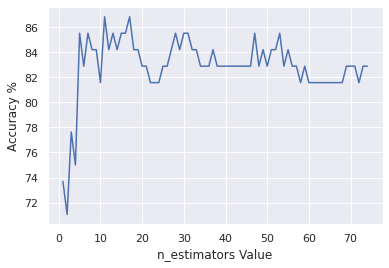

In [352]:
from sklearn.ensemble import RandomForestClassifier  #n_estimotors=11 is best
score_list=[]
for each in range(1,75):
    rf2=RandomForestClassifier(n_estimators=each, random_state=42)
    rf2.fit(x_train, y_train)
    score_list.append(100*rf2.score(x_test, y_test))
    print("n_estimators=", each, "--> Accuracy:", 100*rf2.score(x_test, y_test), "%")

plt.plot([*range(1,75)], score_list)
plt.xlabel("n_estimators Value")
plt.ylabel("Accuracy %")
plt.show()

### Lets look at importance 6 variables

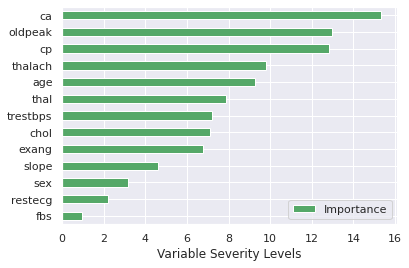

In [353]:
Importance = pd.DataFrame({"Importance": rf.feature_importances_*100},
                         index = x_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Variable Severity Levels");

In [354]:
y=df.target
x=df[['ca','oldpeak','thal','cp','thalach','age']]

In [355]:

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [356]:
rf_2 = RandomForestClassifier().fit(x_train, y_train)
y_pred = rf_2.predict(x_test)
rf_2_score=accuracy_score(y_test, y_pred)
rf_2_score

0.7894736842105263

In [357]:
c_rf2=confusion_matrix(y_test,y_pred)
c_rf2

array([[24, 11],
       [ 5, 36]])

In [358]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [359]:
rf_model1 = RandomForestClassifier()

rf_cv_model1 = GridSearchCV(rf_model1, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2)

In [360]:
#rf_cv_model1.fit(x_train, y_train)    #uzun suruyor

In [361]:
#print("Best Parameters: " + str(rf_cv_model1.best_params_))  #uzun suruyor

In [362]:
rf_tuned1 = RandomForestClassifier(max_depth = 2, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 500)

rf_tuned1.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, max_features=2, n_estimators=500)

In [363]:
y_pred = rf_tuned1.predict(x_test)
rf_tuned_score=accuracy_score(y_test, y_pred)
rf_tuned_score

0.8421052631578947

#### Conclusion:

* rf2_score=84 is the best score and c_rf2 is the best confusion matrix

## 6 ) DECISION TREE METHOD
This model uses a Decision Tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.
* Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed".

* According to ınformation entropy, we can determine which feature is the most important. And we put the most important one to the top of the related tree.

* Decision tree classification can be used for both binary and multi classes

* Coding is the same for all supervised classes and we jus need to change the last part of the code.

In [364]:
from sklearn.tree import DecisionTreeClassifier
y=df.target
x=df.drop("target",axis=1)

### A ) Train -test splitting

In [365]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

### B ) Modeling of Decision Tree

In [366]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [367]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [368]:
dtc_score=accuracy_score(y_test,y_pred)
dtc_score

0.7368421052631579

In [369]:
c_dtc=confusion_matrix(y_test,y_pred)
c_dtc

array([[26,  9],
       [11, 30]])

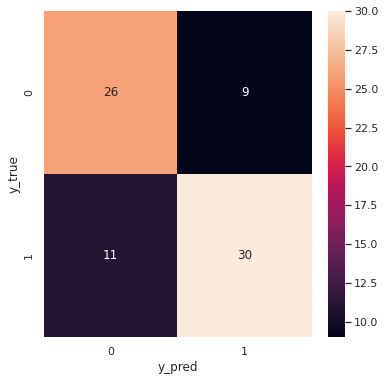

In [370]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=dtc.predict(x_test)
cmdtc=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmdtc, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [371]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        35
           1       0.77      0.73      0.75        41

    accuracy                           0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.74      0.74      0.74        76



### D ) Model tuning

In [372]:
tree_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [374]:
tree1 = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree1, tree_grid, cv = 10, n_jobs = -1, verbose = 2)
tree_cv_model = tree_cv.fit(x_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   14.0s finished


In [375]:
print("Best Parameters: " + str(tree_cv_model.best_params_))

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}


In [376]:
tree1 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)
tree_tuned1 = tree1.fit(x_train, y_train)

In [377]:
y_pred = tree_tuned1.predict(x_test)
dtc_tuned_bestscore=accuracy_score(y_test, y_pred)
dtc_tuned_bestscore

0.7763157894736842

### Lets look at 6 importance variables

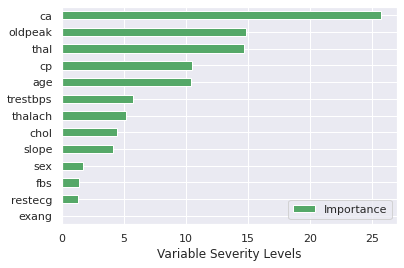

In [378]:
Importance = pd.DataFrame({"Importance": dtc.feature_importances_*100},
                         index = x_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Variable Severity Levels");

In [379]:
y=df.target
x=df[['ca','oldpeak','thal','cp','thalach','age']]

In [380]:

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [381]:
dtc2 = RandomForestClassifier().fit(x_train, y_train)
y_pred = dtc2.predict(x_test)
dtc2_score=accuracy_score(y_test, y_pred)
dtc2_score

0.8026315789473685

In [382]:
c_dtc2=confusion_matrix(y_test,y_pred)
c_dtc2

array([[25, 10],
       [ 5, 36]])

In [383]:
dtc_tuned1 = RandomForestClassifier(max_depth = 2, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 500)
dtc_tuned1.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, max_features=2, n_estimators=500)

In [384]:
y_pred = dtc_tuned1.predict(x_test)
dtc_tuned_bestscore=accuracy_score(y_test, y_pred)
dtc_tuned_bestscore

0.8421052631578947

In [385]:
c_bestdtc=confusion_matrix(y_test,y_pred)
c_bestdtc

array([[27,  8],
       [ 4, 37]])

## LETS SEE ALL SCORE OF CLASSIFICATIONS METHODS 

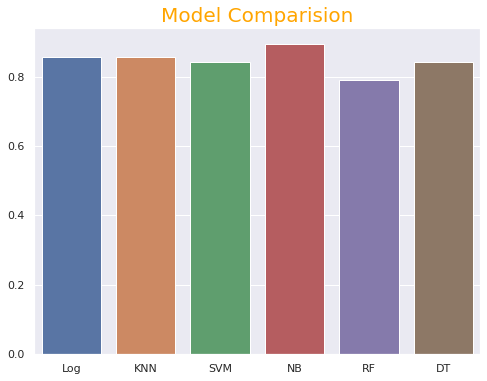

In [387]:
indexx = ["Log","KNN","SVM","NB","RF","DT"]
regressions = [l_score,knn_tuned_bestscore,svm_score1,nb_tuned_bestscore,rf_2_score,dtc_tuned_bestscore]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);

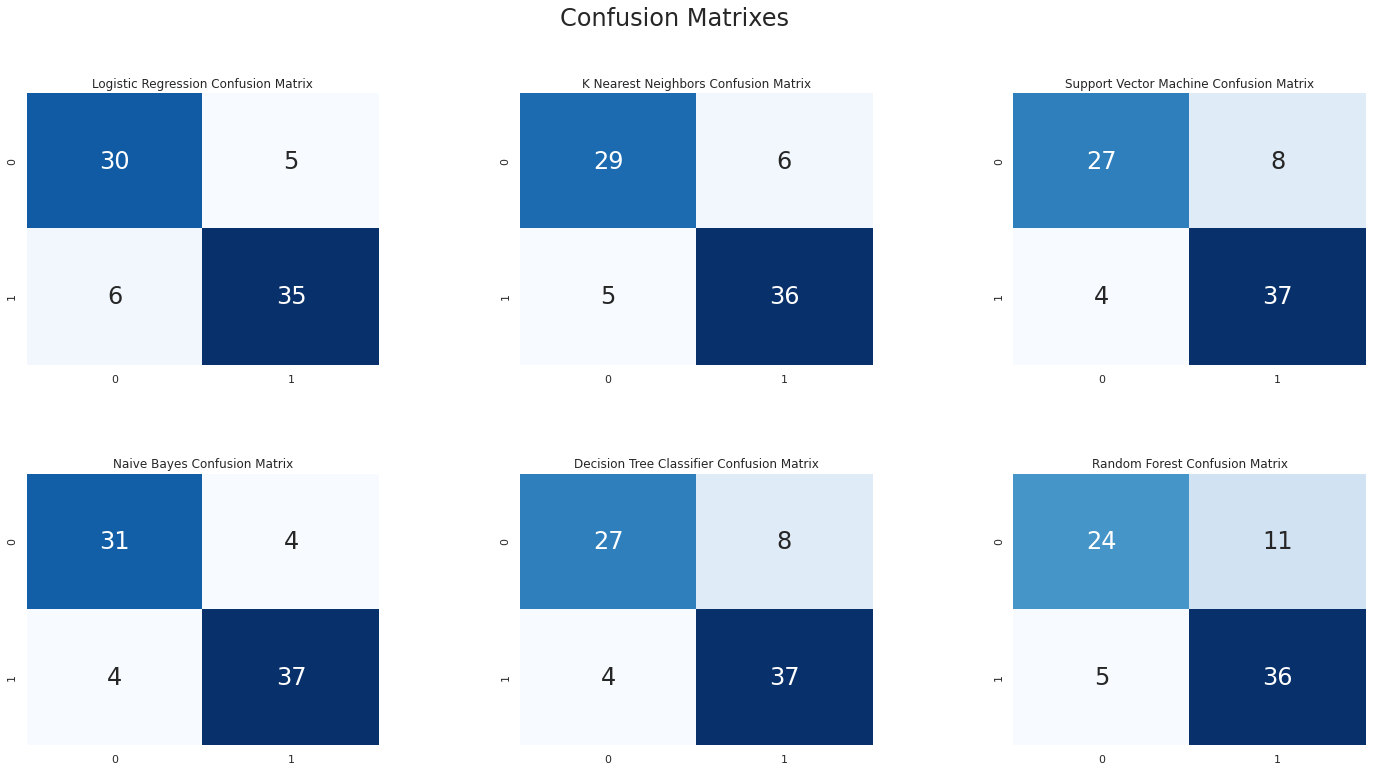

In [391]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(c_l,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cmknn_best,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(c_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cmnb_best,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(c_bestdtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(c_rf2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## FINISH